# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Collection

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Data is in correct format

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Handling Missing Values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#we  have no missing values

# Handling Duplicate data

In [9]:
df.duplicated().sum()

np.int64(240)

In [10]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


# Handling Outliers

We will treat outliers with Inter quartile range. for this we will create two functions ie. outlier_finder that will detect and print the outliers present in the column and then we will make a function named outlier_remover that will remove those outliers. then we will find and remove outliers from every column.

<Axes: ylabel='alcohol'>

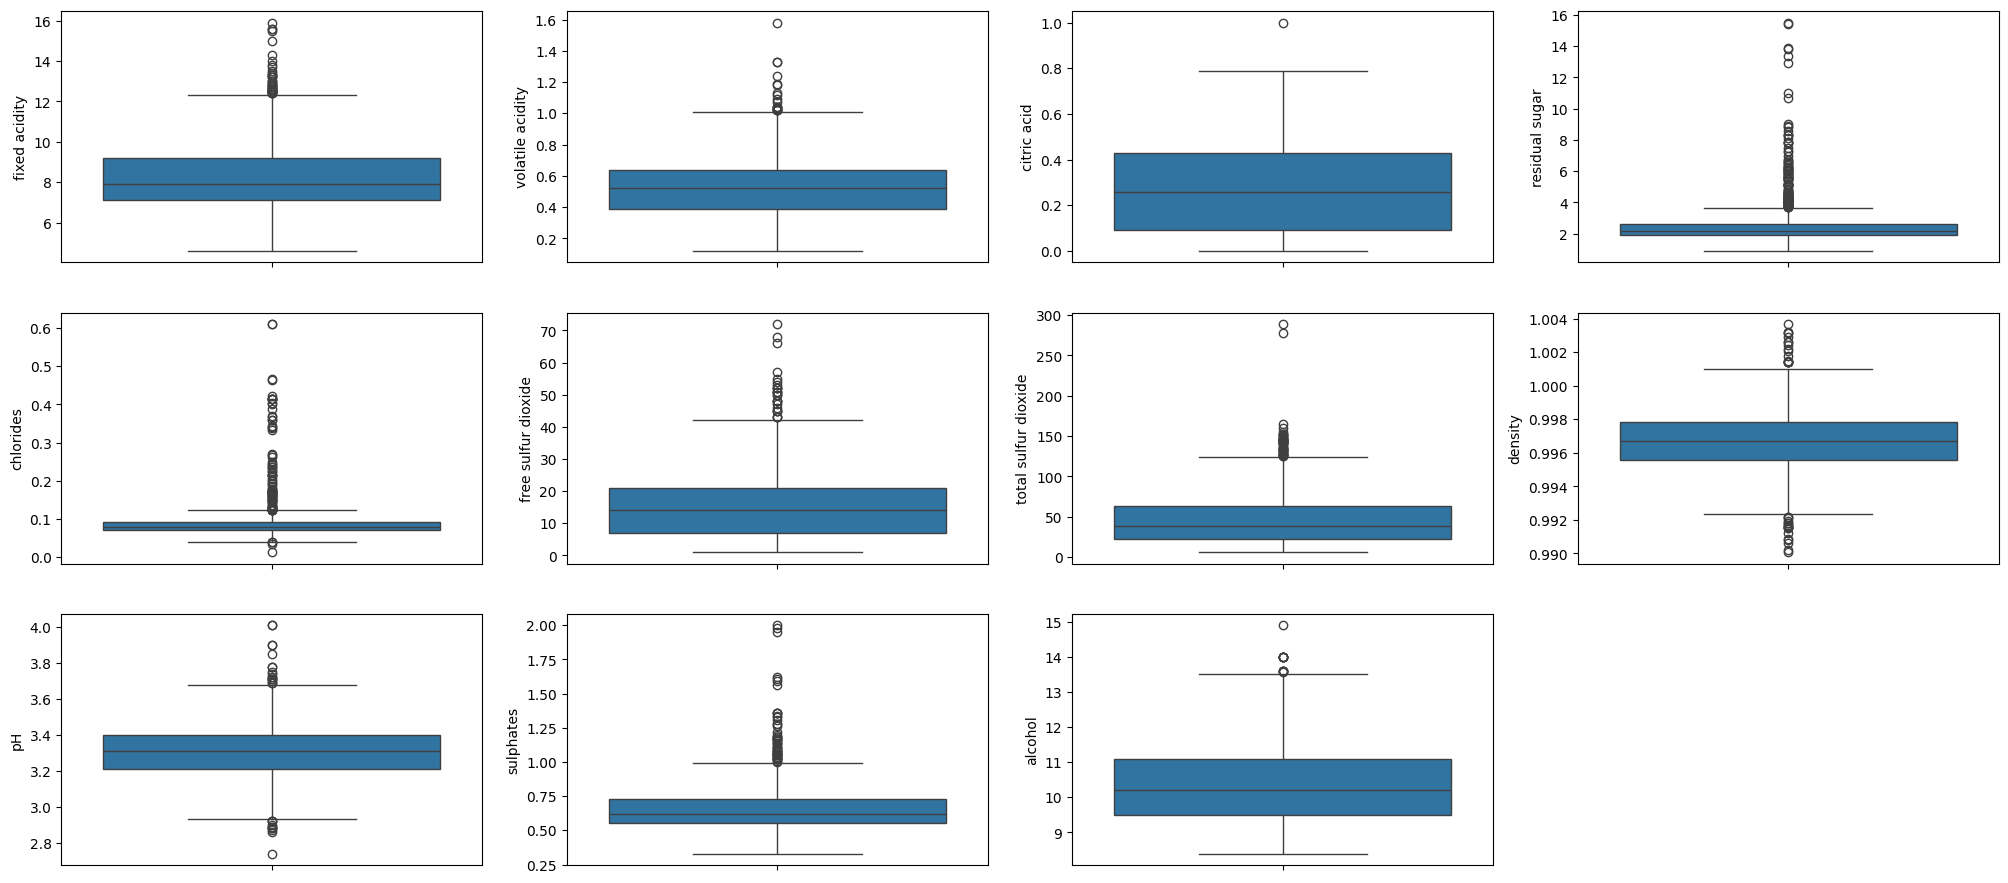

In [14]:
plt.figure(figsize=(25,15))
plt.subplot(4,4,1)
sns.boxplot(df['fixed acidity'])
plt.subplot(4,4,2)
sns.boxplot(df['volatile acidity'])
plt.subplot(4,4,3)
sns.boxplot(df['citric acid'])
plt.subplot(4,4,4)
sns.boxplot(df['residual sugar'])
plt.subplot(4,4,5)
sns.boxplot(df['chlorides'])
plt.subplot(4,4,6)
sns.boxplot(df['free sulfur dioxide'])
plt.subplot(4,4,7)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(4,4,8)
sns.boxplot(df['density'])
plt.subplot(4,4,9)
sns.boxplot(df['pH'])
plt.subplot(4,4,10)
sns.boxplot(df['sulphates'])
plt.subplot(4,4,11)
sns.boxplot(df['alcohol'])

In [15]:
def outlier_finder(check):
    q1,q3=df[check].quantile(0.25),df[check].quantile(0.75)
    iqr=q3-q1
    lower_limit,upper_limit=q1-1.5*iqr,q3+1.5*iqr
    return df[(df[check]<lower_limit)|(df[check]>upper_limit)]

In [16]:
def outlier_remover(checks):
    Q1,Q3=df[checks].quantile(0.25),df[checks].quantile(0.75)
    IQR=Q3-Q1
    Lower_limit,Upper_limit=Q1-1.5*IQR,Q3+1.5*IQR
    return df[(df[checks]>=Lower_limit)&(df[checks]<=Upper_limit)]

In [17]:
#removing outliers of fixed acidity

In [18]:
outlier_finder('fixed acidity')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
359,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6


In [19]:
df=outlier_remover('fixed acidity')

In [20]:
#removing outliers of volatile acidity

In [21]:
outlier_finder('volatile acidity')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


In [22]:
df=outlier_remover('volatile acidity')

In [23]:
#removing outliers of citric acid

In [24]:
outlier_finder('citric acid')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [25]:
df=outlier_remover('citric acid')

In [26]:
#removing outliers of residual sugar

In [27]:
outlier_finder('residual sugar')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


In [28]:
df=outlier_remover('residual sugar')

In [29]:
#removing outliers of chlorides

In [30]:
outlier_finder('chlorides')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
1436,10.0,0.380,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5


In [31]:
df=outlier_remover('chlorides')

In [32]:
#removing outliers of free sulfur dioxide

In [33]:
outlier_finder('free sulfur dioxide')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
90,7.9,0.520,0.26,1.90,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
562,9.0,0.540,0.49,2.90,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5
853,9.3,0.360,0.39,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
925,8.6,0.220,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
926,9.4,0.240,0.33,2.30,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6


In [34]:
df=outlier_remover('free sulfur dioxide')

In [35]:
#removing outliers of total sulfur dioxide

In [36]:
outlier_finder('total sulfur dioxide')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5
188,7.9,0.500,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5
189,7.9,0.490,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,5
190,8.2,0.500,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,5


In [37]:
df=outlier_remover('total sulfur dioxide')

In [38]:
#removing outliers of density

In [39]:
outlier_finder('density')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
289,11.6,0.420,0.53,3.30,0.105,33.0,98.0,1.00100,3.20,0.95,9.200000,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.700000,6
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
465,10.0,0.290,0.40,2.90,0.098,10.0,26.0,1.00060,3.48,0.91,9.700000,5
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
633,10.1,0.935,0.22,3.40,0.105,11.0,86.0,1.00100,3.43,0.64,11.300000,4
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
999,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.900000,6
1017,8.0,0.180,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,0.44,12.700000,6


In [40]:
df=outlier_remover('density')

In [41]:
#removing outliers of pH

In [42]:
outlier_finder('pH')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
650,10.7,0.430,0.39,2.20,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5
657,12.0,0.500,0.59,1.40,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7
667,11.3,0.340,0.45,2.00,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6
930,6.6,0.610,0.01,1.90,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
996,5.6,0.660,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
1111,5.4,0.420,0.27,2.00,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
1166,9.9,0.540,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5


In [43]:
df=outlier_remover('pH')

In [44]:
#removing outliers of sulphates

In [45]:
outlier_finder('sulphates')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5,6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6
245,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6
340,12.2,0.340,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.2,6
350,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
369,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7
372,9.1,0.280,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6


In [46]:
df=outlier_remover('sulphates')

In [47]:
#removing outliers of alcohol

In [48]:
outlier_finder('alcohol')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.9947,3.32,0.79,14.0,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6,7


In [49]:
df=outlier_remover('alcohol')

In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,8.138579,0.522695,0.247949,2.188934,0.078129,14.719797,41.176650,0.996507,3.324579,0.628853,10.395381,5.643655
std,1.460696,0.168185,0.182103,0.448518,0.014966,8.574557,25.201208,0.001583,0.131157,0.111660,0.990583,0.772970
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992400,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996500,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997480,3.410000,0.700000,11.100000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.121000,40.000000,114.000000,1.000400,3.680000,0.940000,13.400000,8.000000


# Feature selection

In [51]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288516,0.653996,0.228080,0.184628,-0.150600,-0.103047,0.594811,-0.699294,0.164897,-0.020864,0.129739
volatile acidity,-0.288516,1.000000,-0.625634,0.013343,0.124037,-0.008736,0.108616,0.044555,0.250983,-0.320766,-0.231145,-0.357357
citric acid,0.653996,-0.625634,1.000000,0.150388,0.051142,-0.081912,-0.007448,0.274774,-0.480568,0.278684,0.164969,0.243164
residual sugar,0.228080,0.013343,0.150388,1.000000,0.246455,0.078124,0.158926,0.381812,-0.068465,0.046317,0.103327,0.035076
chlorides,0.184628,0.124037,0.051142,0.246455,1.000000,0.031840,0.178405,0.413761,-0.174504,-0.102031,-0.305552,-0.184901
free sulfur dioxide,-0.150600,-0.008736,-0.081912,0.078124,0.031840,1.000000,0.626561,-0.010024,0.127138,0.104110,-0.037504,-0.012014
total sulfur dioxide,-0.103047,0.108616,-0.007448,0.158926,0.178405,0.626561,1.000000,0.146110,0.017320,-0.046874,-0.250690,-0.180038
density,0.594811,0.044555,0.274774,0.381812,0.413761,-0.010024,0.146110,1.000000,-0.238390,0.047893,-0.554258,-0.221486
pH,-0.699294,0.250983,-0.480568,-0.068465,-0.174504,0.127138,0.017320,-0.238390,1.000000,0.003509,0.105050,-0.078619
sulphates,0.164897,-0.320766,0.278684,0.046317,-0.102031,0.104110,-0.046874,0.047893,0.003509,1.000000,0.293107,0.447756


<Axes: >

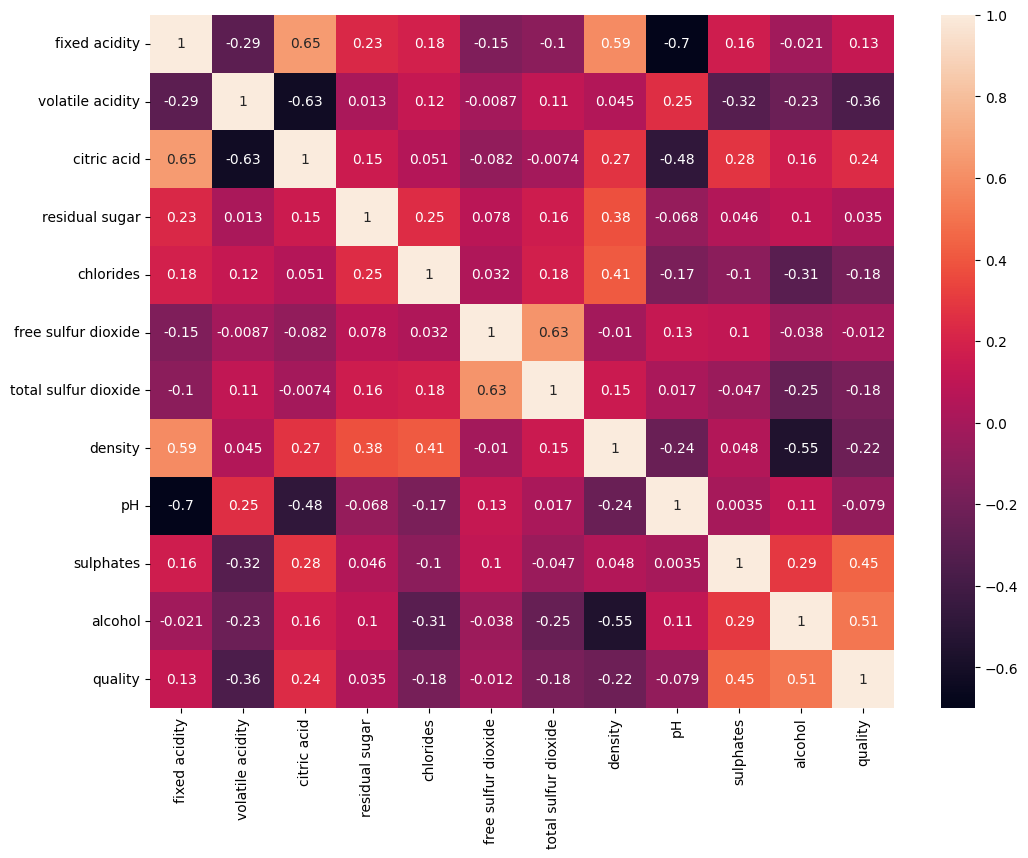

In [52]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(),annot=True)

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='pH', ylabel='volatile acidity'>,
        <Axes: xlabel='alcohol', ylabel='volatile acidity'>,
        <Axes: xlabel='density', ylabel='volatile acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='citric acid'>,
        <Axes: xlabel='volatile acidity', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xla

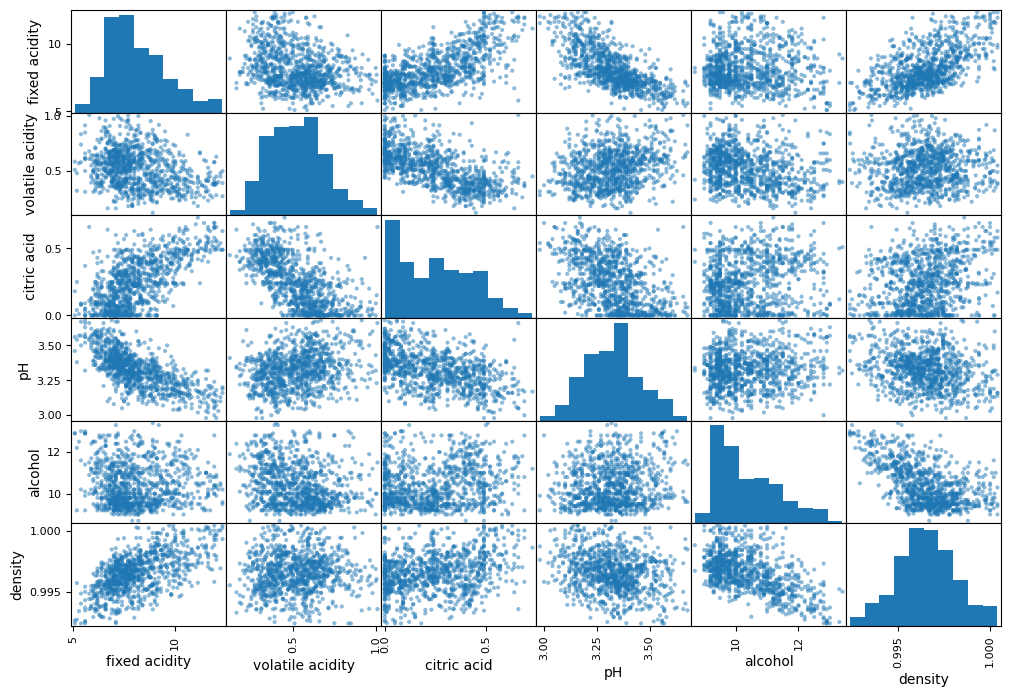

In [53]:
attributes = ["fixed acidity", "volatile acidity", "citric acid", "pH","alcohol",'density']
scatter_matrix(df[attributes], figsize = (12,8))

since fixed acidity and pH is having high negative pearson correlation of -0.7 we will remove one of them, now fixed acidity have correlation of 0.12 with target variable while pH have correlation of -0.081 so we will drop pH column. similarly, we have high positive pearson correlation of 0.65 between citric acid and fixed acidity, each having correlation with target variable of 0.21 and 0.12 respectively. So, we keep citric acid and drop fixed acidity. similarly, we have high negative pearson correlation of -0.63 between citric acid and volatile acidity, each having correlation with target variable of 0.21 and -0.26 respectively. So, we keep volatile acidity and drop citric acid. similarly, we have high positive pearson correlation of 0.63 between total sulfur dioxide and free sulfur dioxide, each having correlation with target variable of -0.16 and -0.07 respectively. So, we keep total sulfur dioxide and free sulfur dioxide.

Now dropping: pH, fixed acidity, citric acid, free sulfur dioxide

In [54]:
df.drop(['pH', 'fixed acidity', 'citric acid', 'free sulfur dioxide'], axis = 1, inplace = True)

In [55]:
df.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,1.9,0.076,34.0,0.9978,0.56,9.4,5
1,0.88,2.6,0.098,67.0,0.9968,0.68,9.8,5
2,0.76,2.3,0.092,54.0,0.9970,0.65,9.8,5
3,0.28,1.9,0.075,60.0,0.9980,0.58,9.8,6
5,0.66,1.8,0.075,40.0,0.9978,0.56,9.4,5


# Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
mmscale=MinMaxScaler()

In [58]:
mmscaledarr=mmscale.fit_transform(df[['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']])

In [59]:
mmscaledarr

array([[0.65168539, 0.28571429, 0.45783133, ..., 0.675     , 0.37704918,
        0.14893617],
       [0.85393258, 0.57142857, 0.72289157, ..., 0.55      , 0.57377049,
        0.23404255],
       [0.71910112, 0.44897959, 0.65060241, ..., 0.575     , 0.52459016,
        0.23404255],
       ...,
       [0.48314607, 0.40816327, 0.28915663, ..., 0.34      , 0.70491803,
        0.53191489],
       [0.58988764, 0.32653061, 0.44578313, ..., 0.38375   , 0.62295082,
        0.31914894],
       [0.21348315, 0.97959184, 0.34939759, ..., 0.38625   , 0.54098361,
        0.4893617 ]])

In [60]:
mmdfscaled=pd.DataFrame(mmscaledarr,columns=['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol'])
mmdfscaled.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.651685,0.285714,0.457831,0.259259,0.675,0.377049,0.148936
1,0.853933,0.571429,0.722892,0.564815,0.550,0.573770,0.234043
2,0.719101,0.448980,0.650602,0.444444,0.575,0.524590,0.234043
3,0.179775,0.285714,0.445783,0.500000,0.700,0.409836,0.234043
4,0.606742,0.244898,0.445783,0.314815,0.675,0.377049,0.148936


In [61]:
df['quality'] = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0 )

In [62]:
# sns.pairplot(df,hue='quality')

In [63]:
X=mmdfscaled

In [64]:
y=df.quality

In [65]:
##setting good quality wine level as score 7 or above

In [66]:
y.value_counts()

quality
0    860
1    125
Name: count, dtype: int64

# oversampling to balance the dataset using SMOTE

In [67]:
#over sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

In [68]:
y_res.value_counts()

quality
0    860
1    860
Name: count, dtype: int64

In [69]:
X.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.651685,0.285714,0.457831,0.259259,0.675,0.377049,0.148936
1,0.853933,0.571429,0.722892,0.564815,0.550,0.573770,0.234043
2,0.719101,0.448980,0.650602,0.444444,0.575,0.524590,0.234043
3,0.179775,0.285714,0.445783,0.500000,0.700,0.409836,0.234043
4,0.606742,0.244898,0.445783,0.314815,0.675,0.377049,0.148936


# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=.2,random_state =42)

In [72]:
X_train.shape, y_train.shape

((1376, 7), (1376,))

In [73]:
X_test.shape, y_test.shape

((344, 7), (344,))

In [74]:
y_train.value_counts(),y_test.value_counts()

(quality
 1    691
 0    685
 Name: count, dtype: int64,
 quality
 0    175
 1    169
 Name: count, dtype: int64)

# Checking the performance of some ML models

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
names = ['SGDClassifier()',
               'DecisionTreeClassifier()',
               'RandomForestClassifier()',
               'XGBClassifier()',
               'KNeighborsClassifier(n_neighbors=1)']

classifiers = [SGDClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier(),
               KNeighborsClassifier(n_neighbors=1)]

In [77]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [78]:
scores

[0.8459302325581395,
 0.9011627906976745,
 0.938953488372093,
 0.9447674418604651,
 0.9476744186046512]

In [79]:
df2 = pd.DataFrame()
df2['name'] = names
df2['score'] = scores
df2.sort_values('score')

,name,score
0,SGDClassifier(),0.845930
1,DecisionTreeClassifier(),0.901163
2,RandomForestClassifier(),0.938953
3,XGBClassifier(),0.944767
4,KNeighborsClassifier(n_neighbors=1),0.947674


# Comparing top three models

In [80]:
# Cross validation for RandomForestClassifier

In [81]:
score1=cross_val_score(RandomForestClassifier(),X_res,y_res,cv=10)

In [82]:
score1

array([0.93023256, 0.95348837, 0.9127907 , 0.9244186 , 0.97674419,
       0.86627907, 0.87209302, 0.90697674, 0.96511628, 0.88372093])

In [83]:
score1.mean()

np.float64(0.9191860465116279)

In [84]:
# Cross validation for XGBClassifier

In [85]:
score2=cross_val_score(XGBClassifier(),X_res,y_res,cv=10)

In [86]:
score2

array([0.94186047, 0.95930233, 0.93023256, 0.91860465, 0.98255814,
       0.88372093, 0.90697674, 0.93023256, 0.95930233, 0.87209302])

In [87]:
score2.mean()

np.float64(0.9284883720930234)

In [88]:
# Cross validation for KNeighborsClassifier

In [89]:
score3=cross_val_score(KNeighborsClassifier(n_neighbors=1),X_res,y_res,cv=10)

In [90]:
score3

array([0.95348837, 0.97674419, 0.93023256, 0.9127907 , 0.96511628,
       0.88953488, 0.88953488, 0.89534884, 0.9127907 , 0.86046512])

In [91]:
score3.mean()

np.float64(0.9186046511627908)

In [92]:
#since XGB classifier performs the best we will choose it to make our model

# Hyperparameter tuning

In [93]:
params={
 "learning_rate"    : [0.15, 0.30 ] ,
 "max_depth"        : [ 6, 10],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.3 ]
    
}

In [94]:
model=XGBClassifier()

In [95]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [96]:
#hypersearch=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [97]:
hypersearch=GridSearchCV(model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [98]:
hypersearch.fit(X_res,y_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.0, 0.3], 'learning_rate': [0.15, 0.3],
                         'max_depth': [6, 10], 'min_child_weight': [1, 3]},
             scoring='accuracy', verbose=3)

In [99]:
tunedmodel=hypersearch.best_estimator_

In [100]:
hypersearch.best_params_

{'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1}

In [101]:
model2=tunedmodel

# checking model accuracy

In [102]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model2, X_train, y_train, cv=10)

In [103]:
y_train_pred

array([1, 1, 1, ..., 0, 1, 1])

In [104]:
s=lambda y_value: 1 if y_value>=0.7 else 0
y_train_pred=np.array([s(x) for x in y_train_pred])

In [105]:
y_train_pred

array([1, 1, 1, ..., 0, 1, 1])

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[619,  66],
       [ 32, 659]])

In [107]:
from sklearn.metrics import precision_score, recall_score
ps=precision_score(y_train, y_train_pred)
ps #precision score

np.float64(0.9089655172413793)

In [108]:
rs=recall_score(y_train, y_train_pred)
rs #recall score

np.float64(0.9536903039073806)

In [109]:
f1=2*((ps*rs)/(ps+rs))
f1 #f1 score

np.float64(0.9307909604519775)

In [110]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
## finally checking the score of the model on test set

In [112]:
result=model2.score(X_test, y_test)
print(result)

0.9447674418604651


In [113]:
from sklearn import metrics

In [114]:
print(metrics.confusion_matrix(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred,digits=3))

[[619  66]
 [ 32 659]]
              precision    recall  f1-score   support

           0      0.951     0.904     0.927       685
           1      0.909     0.954     0.931       691

    accuracy                          0.929      1376
   macro avg      0.930     0.929     0.929      1376
weighted avg      0.930     0.929     0.929      1376



# Pickling the model

In [115]:
data = [[0.4,3,0.07,20,0.9950,0.7,11]]

In [116]:
df.describe()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,0.522695,2.188934,0.078129,41.176650,0.996507,0.628853,10.395381,0.126904
std,0.168185,0.448518,0.014966,25.201208,0.001583,0.111660,0.990583,0.333034
min,0.120000,1.200000,0.038000,6.000000,0.992400,0.330000,8.700000,0.000000
25%,0.390000,1.900000,0.068000,22.000000,0.995500,0.550000,9.500000,0.000000
50%,0.520000,2.100000,0.078000,35.000000,0.996500,0.610000,10.100000,0.000000
75%,0.635000,2.500000,0.087000,55.000000,0.997480,0.700000,11.100000,0.000000
max,1.010000,3.650000,0.121000,114.000000,1.000400,0.940000,13.400000,1.000000


In [117]:
testdfarr=[['volatile acidity', df['volatile acidity'].min(), df['volatile acidity'].max(), data[0][0]],
 ['residual sugar', df['residual sugar'].min(), df['residual sugar'].max(), data[0][1]],
 ['chlorides', df['chlorides'].min(), df['chlorides'].max(), data[0][2]],
 ['total sulfur dioxide', df['total sulfur dioxide'].min(), df['total sulfur dioxide'].max(), data[0][3]],
 ['density', df['density'].min(), df['density'].max(), data[0][4]],
 ['sulphates', df['sulphates'].min(), df['sulphates'].max(), data[0][5]],
 ['alcohol', df['alcohol'].min(), df['alcohol'].max(), data[0][6]]]

In [118]:
testdf=pd.DataFrame(testdfarr, columns=['feature name','min','max','input'])

In [119]:
testdf

,feature name,min,max,input
0,volatile acidity,0.1200,1.0100,0.400
1,residual sugar,1.2000,3.6500,3.000
2,chlorides,0.0380,0.1210,0.070
3,total sulfur dioxide,6.0000,114.0000,20.000
4,density,0.9924,1.0004,0.995
5,sulphates,0.3300,0.9400,0.700
6,alcohol,8.7000,13.4000,11.000


In [120]:
testdf['normalised_input']=(testdf['input']-testdf['min'])/(testdf['max']-testdf['min'])

In [121]:
testdf

,feature name,min,max,input,normalised_input
0,volatile acidity,0.1200,1.0100,0.400,0.314607
1,residual sugar,1.2000,3.6500,3.000,0.734694
2,chlorides,0.0380,0.1210,0.070,0.385542
3,total sulfur dioxide,6.0000,114.0000,20.000,0.129630
4,density,0.9924,1.0004,0.995,0.325000
5,sulphates,0.3300,0.9400,0.700,0.606557
6,alcohol,8.7000,13.4000,11.000,0.489362


In [122]:
nordata=testdf['normalised_input'].to_list()

In [123]:
inputdf = pd.DataFrame([nordata], columns=['volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','sulphates','alcohol'])

In [124]:
inputdf

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.314607,0.734694,0.385542,0.12963,0.325,0.606557,0.489362


In [125]:
model2.predict(inputdf)

array([1])

In [130]:
# pickle.dump(model2, open('wine_quality_model.pkl', 'wb'))

In [127]:
# modelcheck=pickle.load(open('wine_quality_model.pkl','rb'))

In [128]:
# prediction=modelcheck.predict(inputdf)

In [129]:
# prediction[0]